## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('drive/MyDrive/cdtb/Parkinson_Data_Combined.csv')
# load 'train_data.csv'
data

,Unnamed: 0,PATNO,RECRUITMENT_CAT,NUPSOURC_x,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NUPSOURC_y,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,EVENT_ID,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,DRMVIVID,DRMAGRAC,DRMNOCTB,SLPLMBMV,SLPINJUR,DRMVERBL,DRMFIGHT,DRMUMV,DRMOBJFL,MVAWAKEN,DRMREMEM,SLPDSTRB,STROKE,HETRA,PARKISM,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM
0,0,10874,PRODROMA,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BL,1,0.0,0,0,1.0,0,0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,1,12224,PRODROMA,1,0,0,0,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BL,1,1.0,2,1,1.0,0,0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,0,1.0,0,0.0,0.0,1.0,0.0,0.0
2,2,12499,PRODROMA,1,0,0,0,0.0,0.0,0.0,1,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,BL,2,2.0,1,1,2.0,0,1,0.0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1.0,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0
3,3,12593,PRODROMA,1,1,1,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BL,3,3.0,0,1,3.0,0,0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,4,13039,PRODROMA,1,0,0,0,0.0,0.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,BL,0,1.0,0,0,1.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1456,90456,PRODROMA,1,1,0,0,1.0,0.0,0.0,1,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,BL,3,0.0,0,1,0.0,0,0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1457,1457,91097,PRODROMA,1,0,0,0,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,BL,1,1.0,0,1,3.0,0,3,0.0,0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0.0,0.0,1,0.0,0,0.0,0.0,1.0,0.0,0.0
1458,1458,91837,PRODROMA,1,0,0,0,0.0,0.0,0.0,1,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BL,1,1.0,0,1,2.0,0,0,0.0,1,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1459,1459,92490,PRODROMA,1,1,0,0,0.0,2.0,0.0,1,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BL,1,1.0,1,0,3.0,0,1,0.0,1,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


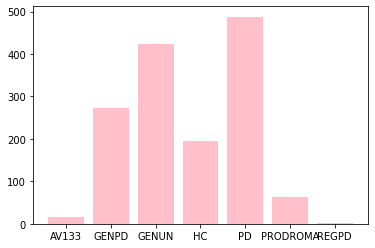

In [2]:
class_x = data['RECRUITMENT_CAT'].value_counts().sort_index().index
class_Freq = data['RECRUITMENT_CAT'].value_counts().sort_index().values

plt.bar(class_x, class_Freq, color="pink")
plt.xticks(class_x)
plt.show()

## Label Preprocessing
#### 1 = HC (Healthy Condition)
#### 2 = PRODROMA
#### 3 = PD (Parkinson's Disease)
#### 4 = GENUN
#### 5 = GENPD

In [3]:
data = data.drop(['Unnamed: 0', 'PATNO', 'EVENT_ID'],axis = 1)
data = data[data['RECRUITMENT_CAT'].isin(['PD', 'HC', 'PRODROMA', 'GENUN', 'GENPD'])]
data = data.replace({'RECRUITMENT_CAT': 'HC'}, {'RECRUITMENT_CAT': 1})
data = data.replace({'RECRUITMENT_CAT': 'PRODROMA'}, {'RECRUITMENT_CAT': 2})
data = data.replace({'RECRUITMENT_CAT': 'PD'}, {'RECRUITMENT_CAT': 3})
data = data.replace({'RECRUITMENT_CAT': 'GENUN'}, {'RECRUITMENT_CAT': 4})
data = data.replace({'RECRUITMENT_CAT': 'GENPD'}, {'RECRUITMENT_CAT': 5})
data = data.astype({'RECRUITMENT_CAT':'float'})
data

,RECRUITMENT_CAT,NUPSOURC_x,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NUPSOURC_y,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,DRMVIVID,DRMAGRAC,DRMNOCTB,SLPLMBMV,SLPINJUR,DRMVERBL,DRMFIGHT,DRMUMV,DRMOBJFL,MVAWAKEN,DRMREMEM,SLPDSTRB,STROKE,HETRA,PARKISM,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM
0,2.0,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0,1.0,0,0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2.0,1,0,0,0,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,2,1,1.0,0,0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,0,1.0,0,0.0,0.0,1.0,0.0,0.0
2,2.0,1,0,0,0,0.0,0.0,0.0,1,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2.0,1,1,2.0,0,1,0.0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1.0,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0
3,2.0,1,1,1,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3.0,0,1,3.0,0,0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2.0,1,0,0,0,0.0,0.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,1.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2.0,1,1,0,0,1.0,0.0,0.0,1,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0.0,0,1,0.0,0,0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1457,2.0,1,0,0,0,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1.0,0,1,3.0,0,3,0.0,0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,0.0,0.0,1,0.0,0,0.0,0.0,1.0,0.0,0.0
1458,2.0,1,0,0,0,0.0,0.0,0.0,1,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1.0,0,1,2.0,0,0,0.0,1,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1459,2.0,1,1,0,0,0.0,2.0,0.0,1,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1.0,1,0,3.0,0,1,0.0,1,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


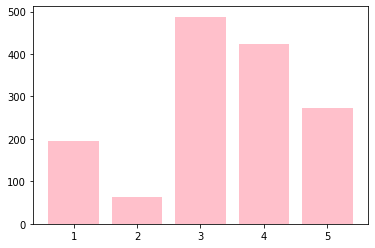

In [4]:
class_x = data['RECRUITMENT_CAT'].value_counts().sort_index().index
class_Freq = data['RECRUITMENT_CAT'].value_counts().sort_index().values

plt.bar(class_x, class_Freq, color="pink")
plt.xticks(class_x)
plt.show()

In [5]:
from sklearn.utils import resample
data_pre1 = data[data["RECRUITMENT_CAT"]==1]
data_pre2 = data[data["RECRUITMENT_CAT"]==2]
data_pre3 = data[data["RECRUITMENT_CAT"]==3]
data_pre4 = data[data["RECRUITMENT_CAT"]==4]
data_pre5 = data[data["RECRUITMENT_CAT"]==5]
data_pre1_u = resample(data_pre1, n_samples=488, replace=True, random_state=0)
data_pre2_u = resample(data_pre2, n_samples=488, replace=True, random_state=0)
data_pre4_u = resample(data_pre4, n_samples=488, replace=True, random_state=0)
data_pre5_u = resample(data_pre5, n_samples=488, replace=True, random_state=0)
data = pd.concat([data_pre1_u, data_pre2_u, data_pre3, data_pre4_u, data_pre5_u], axis=0)
data['RECRUITMENT_CAT'].value_counts()

5.0    488
4.0    488
3.0    488
2.0    488
1.0    488
Name: RECRUITMENT_CAT, dtype: int64

In [6]:
from pycaret.classification import *
exp1 = setup(data, target = 'RECRUITMENT_CAT')

,Description,Value
0,session_id,8260
1,Target,RECRUITMENT_CAT
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(2440, 58)"
5,Missing Values,False
6,Numeric Features,25
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
compare_models()
# Cross validation -> 10

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8582,0.9789,0.8577,0.8612,0.8570,0.8227,0.8240,0.551
et,Extra Trees Classifier,0.8565,0.9814,0.8562,0.8608,0.8559,0.8205,0.8218,0.548
lightgbm,Light Gradient Boosting Machine,0.8495,0.9750,0.8494,0.8502,0.8481,0.8118,0.8126,0.354
catboost,CatBoost Classifier,0.8471,0.9741,0.8469,0.8477,0.8455,0.8088,0.8097,7.559
xgboost,Extreme Gradient Boosting,0.8413,0.9722,0.8411,0.8422,0.8391,0.8015,0.8028,7.150
dt,Decision Tree Classifier,0.8009,0.8756,0.8010,0.8031,0.7960,0.7511,0.7540,0.025
gbc,Gradient Boosting Classifier,0.7791,0.9557,0.7785,0.7817,0.7770,0.7237,0.7254,1.503
lr,Logistic Regression,0.6550,0.9072,0.6549,0.6588,0.6533,0.5684,0.5701,0.678
lda,Linear Discriminant Analysis,0.6116,0.8941,0.6109,0.6285,0.6127,0.5139,0.5172,0.039
ridge,Ridge Classifier,0.6104,0.0000,0.6101,0.6195,0.6095,0.5126,0.5150,0.019


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8260, verbose=0,
                       warm_start=False)

In [23]:
xgboost = create_model('xgboost')
xgboost

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7953,0.9635,0.7958,0.7913,0.7925,0.7441,0.7444
1,0.8596,0.9723,0.8589,0.8638,0.8550,0.8244,0.8277
2,0.7953,0.9731,0.7975,0.7968,0.7943,0.7442,0.7451
3,0.8713,0.9812,0.8709,0.8716,0.8702,0.8392,0.8398
4,0.8363,0.9673,0.8356,0.8357,0.8332,0.7953,0.7965
5,0.8363,0.9705,0.8356,0.8350,0.8331,0.7953,0.7964
6,0.8655,0.9749,0.8652,0.8679,0.8636,0.8318,0.8333
7,0.8235,0.9710,0.8224,0.8247,0.8227,0.7793,0.7801
8,0.8529,0.9700,0.8527,0.8563,0.8511,0.8161,0.8177
9,0.8765,0.9781,0.8767,0.8790,0.8754,0.8456,0.8467


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=8260, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)

In [31]:
import xgboost as xgb
task1_XGB = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=8260, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)
task1_XGB.fit(X,y)
scores = cross_val_score(task1_XGB, X, y, cv=10)
scores.mean(), scores

(0.8721311475409836,
 array([0.9057377 , 0.8647541 , 0.8647541 , 0.85655738, 0.87704918,
        0.85245902, 0.87704918, 0.8852459 , 0.84016393, 0.89754098]))

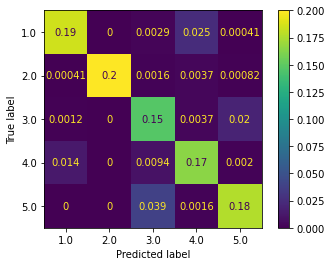

In [32]:
y_pred = cross_val_predict(task1_XGB, X, y, cv=10)
conf_mat = plot_confusion_matrix(task1_XGB, X, y_pred, normalize='all')

In [8]:
gbc = create_model('gbc')
gbc

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7076,0.9454,0.7078,0.7035,0.7024,0.6342,0.6356
1,0.8187,0.9622,0.8171,0.8260,0.8176,0.7731,0.7756
2,0.7895,0.9617,0.7889,0.7936,0.7885,0.7365,0.7380
3,0.8012,0.9610,0.8012,0.8051,0.7999,0.7514,0.7530
4,0.7719,0.9572,0.7713,0.7692,0.7672,0.7148,0.7165
5,0.7719,0.9453,0.7709,0.7679,0.7674,0.7148,0.7161
6,0.8012,0.9597,0.8005,0.8101,0.7989,0.7513,0.7550
7,0.7706,0.9521,0.7686,0.7726,0.7684,0.7130,0.7147
8,0.7647,0.9554,0.7637,0.7708,0.7650,0.7055,0.7070
9,0.7941,0.9575,0.7949,0.7981,0.7951,0.7426,0.7431


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8260, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
rf = create_model('rf')
rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8480,0.9744,0.8473,0.8531,0.8465,0.8097,0.8117
1,0.8713,0.9845,0.8701,0.8742,0.8692,0.8390,0.8408
2,0.8246,0.9765,0.8249,0.8334,0.8263,0.7805,0.7819
3,0.8889,0.9874,0.8889,0.8911,0.8890,0.8611,0.8616
4,0.8538,0.9775,0.8533,0.8540,0.8514,0.8172,0.8184
5,0.8596,0.9736,0.8590,0.8649,0.8575,0.8245,0.8267
6,0.8421,0.9779,0.8417,0.8408,0.8399,0.8026,0.8033
7,0.8824,0.9784,0.8809,0.8884,0.8811,0.8528,0.8549
8,0.8294,0.9797,0.8288,0.8273,0.8272,0.7866,0.7872
9,0.8824,0.9793,0.8826,0.8850,0.8820,0.8529,0.8538


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8260, verbose=0,
                       warm_start=False)

In [10]:
cat = create_model('catboost')
cat

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.9633,0.7901,0.7890,0.7875,0.7366,0.7375
1,0.8772,0.9792,0.8757,0.8811,0.8737,0.8463,0.8487
2,0.8304,0.9715,0.8323,0.8324,0.8305,0.7880,0.7885
3,0.8480,0.9806,0.8476,0.8489,0.8474,0.8099,0.8104
4,0.8538,0.9733,0.8533,0.8529,0.8523,0.8172,0.8177
5,0.8655,0.9752,0.8649,0.8645,0.8625,0.8318,0.8330
6,0.8538,0.9747,0.8534,0.8531,0.8520,0.8172,0.8179
7,0.8412,0.9712,0.8402,0.8407,0.8406,0.8014,0.8016
8,0.8353,0.9759,0.8348,0.8362,0.8331,0.7940,0.7952
9,0.8765,0.9758,0.8769,0.8777,0.8757,0.8456,0.8462


In [11]:
X = data.drop('RECRUITMENT_CAT',axis=1)
y = data['RECRUITMENT_CAT']
# y.value_counts()
X

,NUPSOURC_x,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NUPSOURC_y,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,DRMVIVID,DRMAGRAC,DRMNOCTB,SLPLMBMV,SLPINJUR,DRMVERBL,DRMFIGHT,DRMUMV,DRMOBJFL,MVAWAKEN,DRMREMEM,SLPDSTRB,STROKE,HETRA,PARKISM,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM
585,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,1.0,0,1,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
162,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1,1,2.0,0,0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
394,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,1,1.0,0,0,0.0,1,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
782,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0,0,0.0,0,0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
236,1,0,0,0,0.0,0.0,0.0,1,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0,1,1.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0
737,3,0,0,1,2.0,1.0,1.0,3,0.0,1.0,0.0,0.0,0.0,1.0,2.0,3,0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,1.0,0.0,0.0,2,2.0,0,0,3.0,0,1,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,1.0,0,0.0,1,0.0,0.0,1.0,0.0,0.0
866,1,0,0,1,0.0,0.0,0.0,1,2.0,0.0,3.0,2.0,3.0,1.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,1,2.0,0,0,0.0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,1.0,0.0
753,1,0,0,1,0.0,0.0,0.0,1,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,1,0.0,0,0,0.0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0,0.0,1,0.0,0.0,1.0,0.0,0.0


## Random Forest
Train_Test_split = 10-fold Cross validation
hyperparameter = GridSearchCV


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
task1_RF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=57,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8520, verbose=0,
                       warm_start=False)
task1_RF.fit(X,y)
scores = cross_val_score(task1_RF, X, y, cv=10)
scores.mean(), scores

(0.8692622950819672,
 array([0.91803279, 0.8852459 , 0.83606557, 0.84016393, 0.8852459 ,
        0.88114754, 0.8442623 , 0.86885246, 0.85245902, 0.88114754]))

## Random Forest Confusion Matrix
(train_test split 한 후에, test 값을 x,y로 넣어주어야 함)

In [13]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(task1_RF, X, y, cv=10)

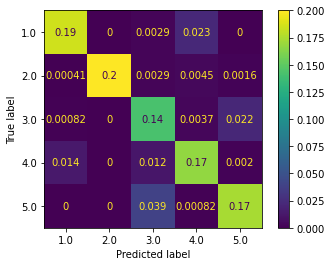

In [14]:
from sklearn.metrics import plot_confusion_matrix
conf_mat = plot_confusion_matrix(task1_RF, X, y_pred, normalize='all')

## CatBoost

In [15]:
from catboost import CatBoostClassifier
task1_Cat = CatBoostClassifier(iterations=10,
                           learning_rate=0.03,
                           loss_function='MultiClass')
task1_Cat.fit(X,y)
scores = cross_val_score(task1_Cat, X, y, cv=10)
scores.mean(), scores

0:	learn: 1.5784615	total: 8.72ms	remaining: 78.5ms
1:	learn: 1.5480654	total: 16.3ms	remaining: 65.3ms
2:	learn: 1.5188637	total: 24ms	remaining: 56.1ms
3:	learn: 1.4901971	total: 31.4ms	remaining: 47.1ms
4:	learn: 1.4650206	total: 38.7ms	remaining: 38.7ms
5:	learn: 1.4407534	total: 49.7ms	remaining: 33.1ms
6:	learn: 1.4196873	total: 56.9ms	remaining: 24.4ms
7:	learn: 1.3995626	total: 64.1ms	remaining: 16ms
8:	learn: 1.3787428	total: 72.4ms	remaining: 8.04ms
9:	learn: 1.3599857	total: 79.8ms	remaining: 0us
0:	learn: 1.5783327	total: 7.15ms	remaining: 64.4ms
1:	learn: 1.5479915	total: 14.5ms	remaining: 58.1ms
2:	learn: 1.5200768	total: 22ms	remaining: 51.4ms
3:	learn: 1.4937253	total: 29.8ms	remaining: 44.7ms
4:	learn: 1.4680695	total: 37.2ms	remaining: 37.2ms
5:	learn: 1.4445563	total: 46ms	remaining: 30.7ms
6:	learn: 1.4255817	total: 53ms	remaining: 22.7ms
7:	learn: 1.4058547	total: 60.8ms	remaining: 15.2ms
8:	learn: 1.3846350	total: 70.1ms	remaining: 7.79ms
9:	learn: 1.3646951	total

(0.5918032786885247,
 array([0.62704918, 0.62295082, 0.58196721, 0.59836066, 0.59836066,
        0.60245902, 0.55737705, 0.58606557, 0.55737705, 0.58606557]))

## CatBoost Confusion matirx & Loss

0:	learn: 1.5783327	total: 7.2ms	remaining: 64.8ms
1:	learn: 1.5479915	total: 14.6ms	remaining: 58.3ms
2:	learn: 1.5200768	total: 22.1ms	remaining: 51.5ms
3:	learn: 1.4937253	total: 29.3ms	remaining: 43.9ms
4:	learn: 1.4680695	total: 36.2ms	remaining: 36.2ms
5:	learn: 1.4445563	total: 43.7ms	remaining: 29.1ms
6:	learn: 1.4255817	total: 50.7ms	remaining: 21.7ms
7:	learn: 1.4058547	total: 58ms	remaining: 14.5ms
8:	learn: 1.3846350	total: 65.5ms	remaining: 7.27ms
9:	learn: 1.3646951	total: 72.5ms	remaining: 0us
0:	learn: 1.5816101	total: 7.6ms	remaining: 68.4ms
1:	learn: 1.5516449	total: 17ms	remaining: 67.9ms
2:	learn: 1.5227408	total: 25.2ms	remaining: 58.8ms
3:	learn: 1.4940168	total: 32.5ms	remaining: 48.7ms
4:	learn: 1.4672743	total: 39.8ms	remaining: 39.8ms
5:	learn: 1.4456651	total: 46.5ms	remaining: 31ms
6:	learn: 1.4226302	total: 53.5ms	remaining: 22.9ms
7:	learn: 1.4030417	total: 60.5ms	remaining: 15.1ms
8:	learn: 1.3823970	total: 68ms	remaining: 7.56ms
9:	learn: 1.3635861	total

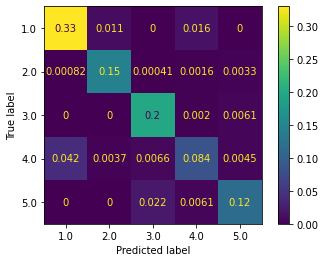

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix

y_pred = cross_val_predict(task1_Cat, X, y, cv=10)
conf_mat2 = plot_confusion_matrix(task1_Cat, X, y_pred, normalize='all')

## Graident Bossting (GBC)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
task1_GBC = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2252, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
task1_GBC.fit(X,y)
scores = cross_val_score(task1_GBC,X,y,cv=10)
scores.mean(), scores

(0.7807377049180328,
 array([0.79098361, 0.81557377, 0.76229508, 0.78278689, 0.78278689,
        0.79918033, 0.7704918 , 0.77459016, 0.76639344, 0.76229508]))

## Gradient Boosting Confusion matrix

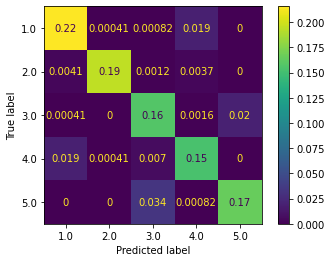

In [18]:
y_pred2 = cross_val_predict(task1_GBC, X, y, cv=10)
conf_mat2 = plot_confusion_matrix(task1_GBC, X, y_pred2, normalize='all')

Feature: 0, Score: 0.00343
Feature: 1, Score: 0.01452
Feature: 2, Score: 0.00783
Feature: 3, Score: 0.01501
Feature: 4, Score: 0.01546
Feature: 5, Score: 0.00693
Feature: 6, Score: 0.00209
Feature: 7, Score: 0.01031
Feature: 8, Score: 0.03388
Feature: 9, Score: 0.02332
Feature: 10, Score: 0.02213
Feature: 11, Score: 0.02467
Feature: 12, Score: 0.01826
Feature: 13, Score: 0.01232
Feature: 14, Score: 0.01892
Feature: 15, Score: 0.00269
Feature: 16, Score: 0.01059
Feature: 17, Score: 0.01363
Feature: 18, Score: 0.00715
Feature: 19, Score: 0.00880
Feature: 20, Score: 0.01617
Feature: 21, Score: 0.00491
Feature: 22, Score: 0.01887
Feature: 23, Score: 0.00845
Feature: 24, Score: 0.00878
Feature: 25, Score: 0.05015
Feature: 26, Score: 0.01350
Feature: 27, Score: 0.01610
Feature: 28, Score: 0.00654
Feature: 29, Score: 0.03356
Feature: 30, Score: 0.03044
Feature: 31, Score: 0.01865
Feature: 32, Score: 0.02897
Feature: 33, Score: 0.03338
Feature: 34, Score: 0.01352
Feature: 35, Score: 0.01524
Fe

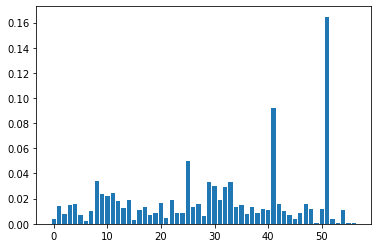

In [19]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
importance = task1_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [20]:
feature_list = pd.concat([pd.Series(X.columns), pd.Series(task1_RF.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending =False)

,features_name,importance
51,PARKISM,0.164610
41,SLPINJUR,0.092055
25,NP2TRMR,0.050147
8,NP1SLPN,0.033885
29,ESS1,0.033564
33,ESS5,0.033380
30,ESS2,0.030435
32,ESS4,0.028969
11,NP1URIN,0.024673
9,NP1SLPD,0.023317


Feature: 0, Score: 0.00266
Feature: 1, Score: 0.00780
Feature: 2, Score: 0.00533
Feature: 3, Score: 0.00663
Feature: 4, Score: 0.01012
Feature: 5, Score: 0.00157
Feature: 6, Score: 0.00653
Feature: 7, Score: 0.01140
Feature: 8, Score: 0.02318
Feature: 9, Score: 0.01463
Feature: 10, Score: 0.00854
Feature: 11, Score: 0.01417
Feature: 12, Score: 0.01132
Feature: 13, Score: 0.01258
Feature: 14, Score: 0.01340
Feature: 15, Score: 0.00338
Feature: 16, Score: 0.01238
Feature: 17, Score: 0.00603
Feature: 18, Score: 0.00516
Feature: 19, Score: 0.01503
Feature: 20, Score: 0.01666
Feature: 21, Score: 0.00642
Feature: 22, Score: 0.01323
Feature: 23, Score: 0.00562
Feature: 24, Score: 0.01135
Feature: 25, Score: 0.11468
Feature: 26, Score: 0.01146
Feature: 27, Score: 0.02101
Feature: 28, Score: 0.01933
Feature: 29, Score: 0.02437
Feature: 30, Score: 0.01322
Feature: 31, Score: 0.01326
Feature: 32, Score: 0.00532
Feature: 33, Score: 0.01057
Feature: 34, Score: 0.00852
Feature: 35, Score: 0.00684
Fe

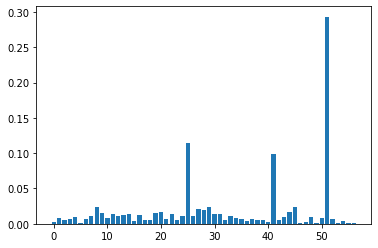

In [21]:
from xgboost import XGBClassifier
importance = task1_GBC.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [22]:
feature_list = pd.concat([pd.Series(X.columns), pd.Series(task1_GBC.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending =False)

,features_name,importance
51,PARKISM,0.293166
25,NP2TRMR,0.114684
41,SLPINJUR,0.099395
29,ESS1,0.024371
8,NP1SLPN,0.023181
45,DRMOBJFL,0.023108
27,NP2WALK,0.021009
28,NP2FREZ,0.019329
44,DRMUMV,0.016764
20,NP2DRES,0.016663
